### Predictive model using Support Vector Machine (SVM)

Support vector machines (SVMs) learning algorithm will be used to build the predictive model.  SVMs are one of the most popular classification algorithms, and have an elegant way of transforming nonlinear data so that one can use a linear algorithm to fit a linear model to the data (Cortes and Vapnik 1995)

Kernelized support vector machines are powerful models and perform well on a variety of datasets. 

### Important Parameters
The important parameters in kernel SVMs are the
* Regularization parameter C, 
* The choice of the kernel,(linear, radial basis function(RBF) or polynomial)
* Kernel-specific parameters. 

gamma and C both control the complexity of the model, with large values in either resulting in a more complex model. Therefore, good settings for the two parameters are usually strongly correlated, and C and gamma should be adjusted together.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

#Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

 #visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")
plt.rcParams['figure.figsize'] = (8,4) 



In [2]:
data = pd.read_csv('C:\data\clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)


In [3]:
#Assign predictors to a variable of ndarray (matrix) type
array = data.values
X = array[:,1:31] # features
y = array[:,0]

#transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
y = le.fit_transform(y)

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


#### Performing a standard train/test split

In [4]:
#Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=2, stratify=y)

# 6. Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

 #7. Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print (classifier_score)

0.9532163742690059


#### Confusion matrix

In [5]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[106   1]
 [  7  57]]


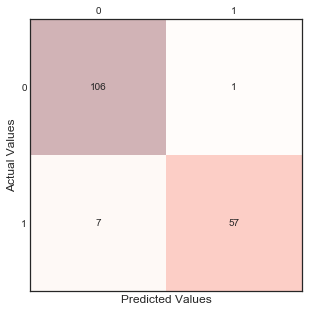

             precision    recall  f1-score   support

          0       0.94      0.99      0.96       107
          1       0.98      0.89      0.93        64

avg / total       0.95      0.95      0.95       171



In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

#### Classification with cross-validation

As discussed in notebook [NB3],splitting the data into test and training sets is crucial to avoid overfitting. This allows generalization of real, previously-unseen data. Cross-validation extends this idea further. Instead of having a single train/test split, we specify **so-called folds** so that the data is divided into similarly-sized folds. 

* The expected performance of the classifier, called cross-validation error, is then simply an average of error rates computed on each holdout sample. 

This process is demonstrated by first performing a standard train/test split, and then computing cross-validation error.


The classifier accuracy score is 0.96


The 10-fold cross-validation accuracy score for this classifier is 0.96

             precision    recall  f1-score   support

          0       0.96      0.99      0.97       143
          1       0.98      0.93      0.95        85

avg / total       0.97      0.96      0.96       228



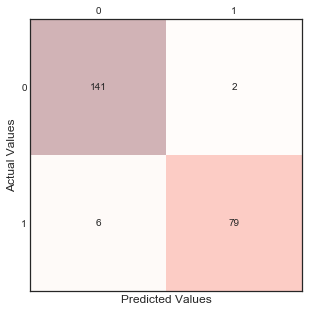

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
fit = pca.fit(Xs)
X_pca = pca.transform(Xs)

# 5. Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state=2, stratify=y)

# 6. Create an SVM classifier and train it on 60% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

 #7. Analyze accuracy of predictions on 40% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print ('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))



# Get average of 10-fold cross-validation score using an SVC estimator.
n_folds = 10
cv_error = np.average(cross_val_score(SVC(), X_pca, y, cv=n_folds))
print ('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))

y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

The above evaluations were based on using the entire set of features. You will now employ the correlation-based feature selection and find the change in accuracy 

In [8]:
from sklearn.feature_selection import SelectKBest, f_regression
clf2 = make_pipeline(SelectKBest(f_regression, k=10),SVC(probability=True))

scores = cross_val_score(clf2, Xs, y, cv=10)

# Get average of 10-fold cross-validation score using an SVC estimator.
n_folds = 10
accuracy = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print ('The {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, accuracy))

The 10-fold cross-validation accuracy score for this classifier is 0.98



### Model Accuracy: Receiver Operating Characteristic (ROC) curve

In statistical modeling and machine learning, a commonly-reported performance measure of model accuracy for binary classification problems is Area Under the Curve (AUC).

To understand what information the ROC curve conveys, consider the so-called confusion matrix that essentially is a two-dimensional table where the classifier model is on one axis (vertical), and ground truth is on the other (horizontal) axis, as shown below. Either of these axes can take two values (as depicted)


 Model says "+" |Model says  "-" 
--- | --- | ---
`True positive` | `False negative` | ** Actual: "+" **
 `False positive`  | `True negative` |  Actual: "-"
 In an ROC curve, you plot “True Positive Rate” on the Y-axis and “False Positive Rate” on the X-axis, where the values “true positive”, “false negative”, “false positive”, and “true negative” are events (or their probabilities) as described above. The rates are defined according to the following:
> * True positive rate (or sensitivity)}: tpr = tp / (tp + fn)
> * False positive rate:       fpr = fp / (fp + tn)
> * True negative rate (or specificity): tnr = tn / (fp + tn)

In all definitions, the denominator is a row margin in the above confusion matrix. Thus,one can  express
* the true positive rate (tpr) as the probability that the model says "+" when the real value is indeed "+" (i.e., a conditional probability). However, this does not tell you how likely you are to be correct when calling "+" (i.e., the probability of a true positive, conditioned on the test result being "+").
          

F:\anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


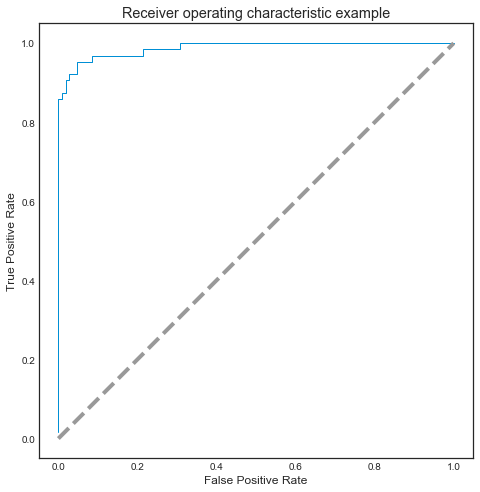

In [9]:
from sklearn.metrics import roc_curve, auc
# Plot the receiver operating characteristic curve (ROC).
plt.figure(figsize=(10,8))
probas_ = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.axes().set_aspect(1)

* To interpret the ROC correctly, consider what the points that lie along the diagonal represent. For these situations, there is an equal chance of "+" and "-" happening. Therefore, this is not that different from making a prediction by tossing of an unbiased coin. Put simply, the classification model is random.

* For the points above the diagonal, tpr > fpr, and the model says that you are in a zone where you are performing better than random. For example, assume tpr = 0.99 and fpr = 0.01, Then, the probability of being in the true positive group is $(0.99 / (0.99 + 0.01)) = 99\%$. Furthermore, holding fpr constant, it is easy to see that the more vertically above the diagonal you are positioned, the better the classification model.